# Analitica de métricas y Recomendaciones de Marketing para al empresa Showz

##  Objetivo 

Optimizar los gastos de Marketing de la empresa Showz encargada de la venta de boletos para eventos

Para la resolución y análisis de estos datos es necesario tener en mente las siguientes preguntas que son clave para acercarnos a una conclusión mas acertada. 

¿Cómo los clientes usan el servicio?
¿Cuándo empiezan a comprar?
¿Cuánto dinero aporta cada cliente a la compañía?
¿Cuándo los ingresos cubren el costo de adquisición de los clientes?

## Visualizacion y exploración de datos

In [84]:
#Se importan las librerias que se van a utilizar en el desarrollo del análisis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns


In [85]:
#Cargue de los DF correspondientes

visitas=pd.read_csv('/datasets/visits_log_us.csv') 
ordenes=pd.read_csv('/datasets/orders_log_us.csv')
costos=pd.read_csv('/datasets/costs_us.csv')

### Visitas

In [86]:
#Visualización del primer DF
visitas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [87]:
#Cambio de los nombres de las columnas. Se reemplazan los espacios por escritura sanke case y las mayusculas por minusculas

new_columns=[]

for column in visitas.columns:
    modified_columns=column.lower().replace(" ","_")
    new_columns.append(modified_columns)
    
visitas.columns=new_columns

print(visitas.columns)

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')


In [88]:
#Se cambia el tipo de dato de las columnas ends_ts y start_ts a tipo datetime

visitas['start_ts']=pd.to_datetime(visitas['start_ts'])
visitas['end_ts']=pd.to_datetime(visitas['end_ts'])

visitas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [89]:
visitas.head(10)

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


In [90]:
#Verificacion de la fecha maxima de registros
visitas['start_ts'].max()

Timestamp('2018-05-31 23:59:00')

In [91]:
#Verificacion de la fecha minima de registros
visitas['start_ts'].min()

Timestamp('2017-06-01 00:01:00')

### Ordenes 

In [92]:
#Visualización del segundo DF

ordenes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [93]:
#Cambio de los nombres de las columnas. Se reemplazan los espacios por escritura sanke case y las mayusculas por minusculas

new_columns=[]

for column in ordenes.columns:
    modified_columns=column.lower().replace(" ","_")
    new_columns.append(modified_columns)
    
ordenes.columns=new_columns

print(ordenes.columns)

Index(['buy_ts', 'revenue', 'uid'], dtype='object')


In [94]:
#Se cambia el tipo de dato de la columna buy_ts a tipo datetime

ordenes['buy_ts']=pd.to_datetime(ordenes['buy_ts'])

ordenes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [95]:
ordenes.head(10)

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


### Costos

In [96]:
#Visualización del tercer DF

costos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [97]:
#Se cambia el tipo de dato de la columna dt a tipo datetime

costos['dt']=pd.to_datetime(costos['dt'])

costos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [98]:
costos.head(10)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


## Análisis de las metricas

Se va a realizar el analisis de los datos por Data Frame, cabe resaltar que Showz es una empresa de venta de entradas de eventos

### Visitas

Queremos resolver las siguientes preguntas:

¿Cuántas personas usan la app cada día, semana y mes?
¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).
¿Cuál es la duración de cada sesión?
¿Con qué frecuencia los usuarios regresan?

In [99]:
#Duracion de cada sesion
visitas['duracion_min'] = (visitas['end_ts'] - visitas['start_ts']).dt.total_seconds() / 60

visitas

,device,end_ts,source_id,start_ts,uid,duracion_min
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,18.000000
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,28.000000
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0.000000
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,24.000000
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,0.000000
...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,0.316667
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,0.316667
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,0.316667
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,0.316667


In [100]:
#Usuarios unicos por dia

usuarios_diarios=visitas.groupby('start_ts')['uid'].nunique().reset_index()

usuarios_diarios

,start_ts,uid
0,2017-06-01 00:01:00,1
1,2017-06-01 00:02:00,2
2,2017-06-01 00:04:00,1
3,2017-06-01 00:09:00,1
4,2017-06-01 00:14:00,3
...,...,...
224298,2018-05-31 23:54:00,5
224299,2018-05-31 23:56:00,1
224300,2018-05-31 23:57:00,2
224301,2018-05-31 23:58:00,1


In [101]:
# Sesiones por dia

sesiones_diarias=visitas.groupby('start_ts')['uid'].count().reset_index()
sesiones_diarias

,start_ts,uid
0,2017-06-01 00:01:00,1
1,2017-06-01 00:02:00,2
2,2017-06-01 00:04:00,1
3,2017-06-01 00:09:00,1
4,2017-06-01 00:14:00,3
...,...,...
224298,2018-05-31 23:54:00,5
224299,2018-05-31 23:56:00,1
224300,2018-05-31 23:57:00,2
224301,2018-05-31 23:58:00,1


In [102]:
#Creacion de columnas para los dias, semanas, meses y años

visitas[['año_inicio','semana_inicio', 'dia_inicio']]=visitas['start_ts'].dt.isocalendar()

visitas['mes_inicio']=visitas['start_ts'].dt.month

visitas['mes_final']=visitas['end_ts'].dt.month


visitas


,device,end_ts,source_id,start_ts,uid,duracion_min,año_inicio,semana_inicio,dia_inicio,mes_inicio,mes_final
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,18.000000,2017,51,3,12,12
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,28.000000,2018,8,1,2,2
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0.000000,2017,26,6,7,7
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,24.000000,2018,20,7,5,5
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,0.000000,2017,52,3,12,12
...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,0.316667,2017,30,6,7,7
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,0.316667,2018,4,4,1,1
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,0.316667,2018,9,6,3,3
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,0.316667,2017,44,4,11,11


In [103]:
#Agrupacion de datos por año

visitas_año=visitas.groupby('año_inicio')['uid'].nunique()
print('Usuarios unicos- anuales:')

visitas_año

Usuarios unicos- anuales:


año_inicio
2017    131777
2018    112535
Name: uid, dtype: int64

In [104]:
#Agrupacion de datos por meses

visitas_mes=visitas.groupby(['año_inicio','mes_inicio'])['uid'].nunique().reset_index()

print('Usuarios unicos -mensuales:')
visitas_mes

Usuarios unicos -mensuales:


,año_inicio,mes_inicio,uid
0,2017,6,13259
1,2017,7,14183
2,2017,8,11631
3,2017,9,18975
4,2017,10,29692
5,2017,11,32797
6,2017,12,31557
7,2018,1,28716
8,2018,2,28749
9,2018,3,27473


In [105]:
#Agrupacion de datos por semanas

visitas_semanal=visitas.groupby(['año_inicio','semana_inicio'])['uid'].nunique().reset_index()
print('Usuarios unicos -semanales:')

visitas_semanal.head(10)

Usuarios unicos -semanales:


,año_inicio,semana_inicio,uid
0,2017,22,2021
1,2017,23,4129
2,2017,24,2812
3,2017,25,2878
4,2017,26,3064
5,2017,27,3294
6,2017,28,4355
7,2017,29,3841
8,2017,30,2655
9,2017,31,2364


In [106]:
#Agrupacion de datos por dias, donde el lunes comienza en 1 y se cuenta de manera consecutiva hasta el domingo que seria 7

visitas_diario=visitas.groupby(['año_inicio','dia_inicio'])['uid'].nunique().reset_index()
print('Usuarios unicos -diario:')
visitas_diario

Usuarios unicos -diario:


,año_inicio,dia_inicio,uid
0,2017,1,25217
1,2017,2,24073
2,2017,3,23559
3,2017,4,25578
4,2017,5,26378
5,2017,6,20141
6,2017,7,19546
7,2018,1,21466
8,2018,2,21265
9,2018,3,20737


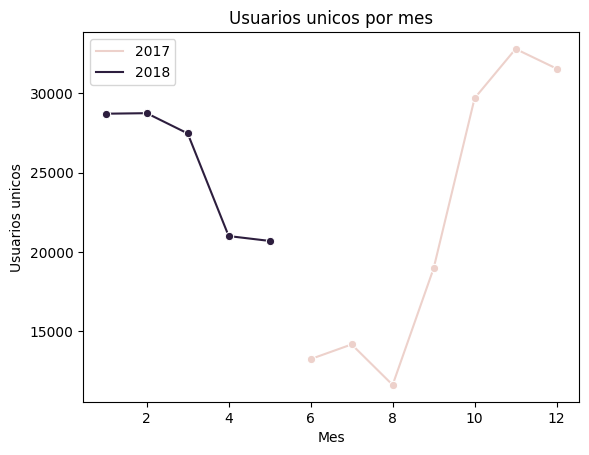

In [107]:
# Comportamiento de los usuarios segun el mes
sns.lineplot(data=visitas_mes, x="mes_inicio", y="uid", hue= "año_inicio", marker="o")

plt.xlabel("Mes")
plt.ylabel("Usuarios unicos")
plt.title("Usuarios unicos por mes")
plt.legend()
plt.show()

La grafica muestra que en el 2017 hubo mayor uso de la app por mes, luego del paso de los meses, se evidencia que la frecuencia disminuye

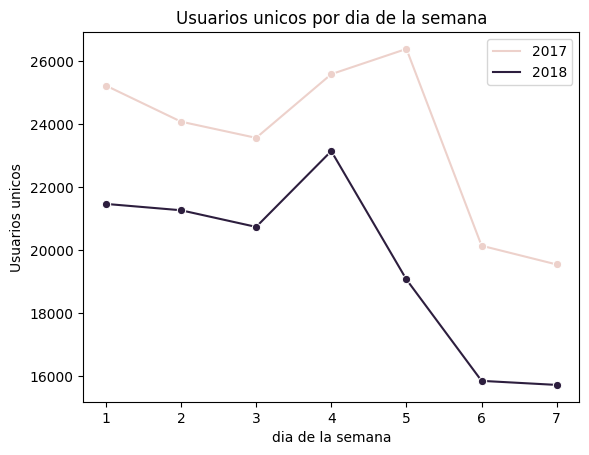

In [108]:
#comportamiento de los usuarios segun el dia de la semana
sns.lineplot(data=visitas_diario, x="dia_inicio", y="uid", hue= "año_inicio", marker="o")

plt.xlabel("dia de la semana")
plt.ylabel("Usuarios unicos")
plt.title("Usuarios unicos por dia de la semana")
plt.legend()
plt.show()

Se evidencia un comportamiento parecido para los dos años. Los dias jueves suelen tener mayor demanda de usuarios, mientras que a medida que se acerca el fin de semana las personas no suelen comprar boleteria.

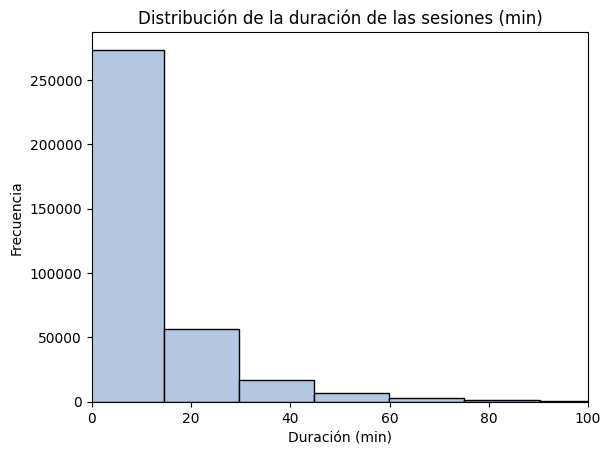

In [109]:
# Distribución de la duración de las sesiones

plt.hist(visitas['duracion_min'], bins=50, color='#b5c6e0',edgecolor='black')
plt.title('Distribución de la duración de las sesiones (min)')
plt.xlim(0,100)
plt.xlabel('Duración (min)')
plt.ylabel('Frecuencia')
plt.show()

La grafica muestra una distribucion sesgada a la derecha, indicando que la mayoria de los usuarios tardan entre 15-20 minutos en la aplicacion

In [110]:
#Frecuencia con la que los usuarios regresan por cohortes mensuales

visitas_ordenadas = visitas.sort_values(by=['año_inicio','uid', 'mes_inicio']) #se organizan los valores en orden cronologico
visitas_ordenadas['visita_previa'] =visitas_ordenadas.groupby('uid')['mes_inicio'].shift(1) # se calcula la visita anterior del mismo usuario
visitas_ordenadas['meses_desde_ultima_visita'] = (visitas_ordenadas['mes_inicio'] - visitas_ordenadas['visita_previa']) # Se cuentan cuantos dias han pasado desde la ultima visita

display(visitas_ordenadas[['uid', 'mes_inicio', 'visita_previa', 'meses_desde_ultima_visita']].head(10))


,uid,mes_inicio,visita_previa,meses_desde_ultima_visita
173818,297729379853735,6,NaN,NaN
173142,313578113262317,9,NaN,NaN
34588,325320750514679,9,NaN,NaN
183750,407573351275847,6,NaN,NaN
141543,526778907996220,10,NaN,NaN
307329,526778907996220,10,10.0,0.0
2566,673910773442622,9,NaN,NaN
230869,801587065806307,10,NaN,NaN
217886,1260655184775459,10,NaN,NaN
285441,1260655184775459,10,10.0,0.0


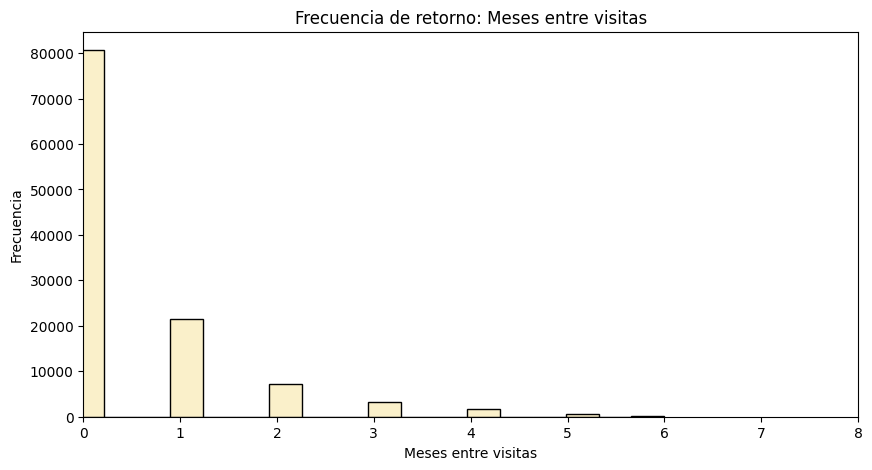

In [111]:
# Distribución de la duración de las sesiones (sin valores nulos)

plt.figure(figsize=(10, 5))
plt.hist(visitas_ordenadas['meses_desde_ultima_visita'].dropna(), bins=50, color='#faf0ca', edgecolor='black')
plt.title('Frecuencia de retorno: Meses entre visitas')
plt.xlim(0,8)
plt.xlabel('Meses entre visitas')
plt.ylabel('Frecuencia')
plt.show()

La mayoria de usuarios tienden a volver entre 0 y 1 mes. Sin embargo, hay otros usuarios que tienen a volver hasta 6 meses despues.

### Ventas/ Ordenes

In [112]:
ordenes.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


#### Tiempo de conversion de los clientes 

In [113]:
#Fecha de compra convertida a mes.
ordenes['año_compra']=ordenes['buy_ts'].dt.year
ordenes['mes_compra']=ordenes['buy_ts'].dt.month

ordenes

,buy_ts,revenue,uid,año_compra,mes_compra
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017,6
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017,6
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017,6
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017,6
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017,6
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018,5
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018,5
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018,5
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018,5


In [114]:
#Calcula la primera visita de cada cliente eliminando posibles ingresos del mismo cliente
primera_visita=visitas.sort_values(['uid','año_inicio','mes_inicio']).drop_duplicates('uid', keep='first')

display(primera_visita[['uid','año_inicio','mes_inicio']])


,uid,año_inicio,mes_inicio
196543,11863502262781,2018,3
257333,49537067089222,2018,2
173818,297729379853735,2017,6
173142,313578113262317,2017,9
34588,325320750514679,2017,9
...,...,...,...
286167,18446403737806311543,2017,11
175259,18446424184725333426,2017,12
293449,18446556406699109058,2018,1
319162,18446621818809592527,2017,12


In [115]:
#Calcula la primera compra de cada cliente, se eliminan las demas ordenes para cada cliente, solo se deja la primera
primera_compra=ordenes.sort_values(['uid','año_compra','mes_compra']).drop_duplicates('uid', keep='first')
display(primera_compra[['uid','año_compra','mes_compra']])

,uid,año_compra,mes_compra
27944,313578113262317,2018,1
213,1575281904278712,2017,6
12235,2429014661409475,2017,10
31462,2464366381792757,2018,1
19140,2551852515556206,2017,11
...,...,...,...
19096,18445147675727495770,2017,11
8707,18445407535914413204,2017,9
42213,18445601152732270159,2018,3
35572,18446156210226471712,2018,2


In [116]:
#Unir las dos tablas de primera compra y primera visita para calcular la diferencia en meses de las dos acciones

conversion = pd.merge(primera_visita, primera_compra, on='uid', how='inner')

display(conversion[['uid','año_compra','mes_compra','año_inicio','mes_inicio']])
        

,uid,año_compra,mes_compra,año_inicio,mes_inicio
0,313578113262317,2018,1,2017,9
1,1575281904278712,2017,6,2017,6
2,2429014661409475,2017,10,2017,10
3,2464366381792757,2018,1,2018,1
4,2551852515556206,2017,11,2017,11
...,...,...,...,...,...
36518,18445147675727495770,2017,11,2017,8
36519,18445407535914413204,2017,9,2017,9
36520,18445601152732270159,2018,3,2017,8
36521,18446156210226471712,2018,2,2017,11


In [117]:
# Se tienen que considerar los años de diferencia tambien para evitar calculos erroneos en los meses

conversion['conversion_meses'] = ((conversion['año_compra'] - conversion['año_inicio'])*12 +
(conversion['mes_compra'] - conversion['mes_inicio']))

display(conversion[['uid','año_compra','mes_compra','año_inicio','mes_inicio','conversion_meses']])


,uid,año_compra,mes_compra,año_inicio,mes_inicio,conversion_meses
0,313578113262317,2018,1,2017,9,4
1,1575281904278712,2017,6,2017,6,0
2,2429014661409475,2017,10,2017,10,0
3,2464366381792757,2018,1,2018,1,0
4,2551852515556206,2017,11,2017,11,0
...,...,...,...,...,...,...
36518,18445147675727495770,2017,11,2017,8,3
36519,18445407535914413204,2017,9,2017,9,0
36520,18445601152732270159,2018,3,2017,8,7
36521,18446156210226471712,2018,2,2017,11,3


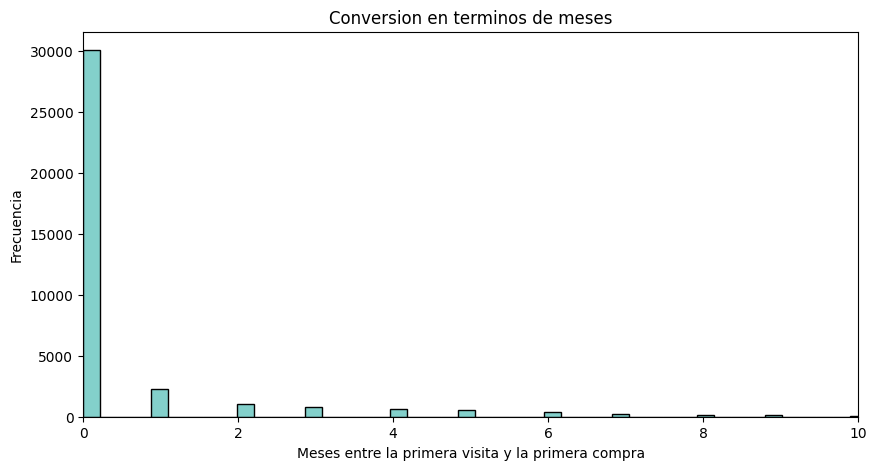

In [118]:
# Distribución de la conversion de los clientes por mes

plt.figure(figsize=(10, 5))
plt.hist(conversion['conversion_meses'], bins=50, color='#83d0cb', edgecolor='black')
plt.title('Conversion en terminos de meses')
plt.xlim(0,10)
plt.xlabel('Meses entre la primera visita y la primera compra')
plt.ylabel('Frecuencia')
plt.show()

La gran mayoria de los clientes tiende a comprar el mismo mes de la primera visita

####  Pedidos que realizan los clientes por mes

In [119]:
#Se van a contabiliar la cantidad de boletas que compraron los clientes por mes

pedidos_clientes_mes=ordenes.groupby(['año_compra','mes_compra'])['uid'].count().reset_index()
pedidos_clientes_mes

,año_compra,mes_compra,uid
0,2017,6,2354
1,2017,7,2363
2,2017,8,1807
3,2017,9,3387
4,2017,10,5679
5,2017,11,5659
6,2017,12,6218
7,2018,1,4721
8,2018,2,5281
9,2018,3,5326


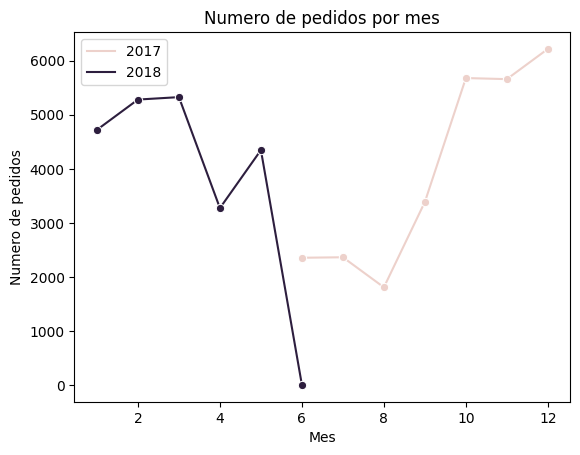

In [120]:
#Variacion de la compra de boletos segun el mes

sns.lineplot(data=pedidos_clientes_mes, x="mes_compra", y="uid", hue= "año_compra", marker="o")

plt.xlabel("Mes")
plt.ylabel("Numero de pedidos")
plt.title("Numero de pedidos por mes")
plt.legend()
plt.show()

Se evidencia una caida significativa de compra de boleteria desde el 2017 al 2018

####  Tamaño promedio de compra

In [121]:
#Ingreso promedio por mes

ganancia_mes=ordenes.groupby(['año_compra','mes_compra'])['revenue'].mean().reset_index()
ganancia_mes

,año_compra,mes_compra,revenue
0,2017,6,4.060106
1,2017,7,5.306589
2,2017,8,4.847139
3,2017,9,5.416448
4,2017,10,4.928280
5,2017,11,4.783518
6,2017,12,5.852139
7,2018,1,4.112927
8,2018,2,4.840095
9,2018,3,5.413930


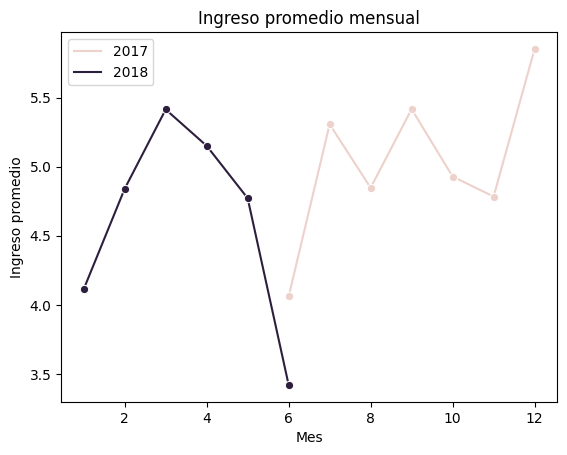

In [122]:
#Grafica del comportamiento del promedio del ingreso mensual
sns.lineplot(data=ganancia_mes, x="mes_compra", y="revenue", hue= "año_compra", marker="o")

plt.xlabel("Mes")
plt.ylabel("Ingreso promedio")
plt.title("Ingreso promedio mensual")
plt.legend()
plt.show()

In [123]:
#Tamaño del ingreso en general

tamaño_general=ordenes['revenue'].mean()

print(f"El tamaño promedio del ingreso es: ${tamaño_general.round()}")

El tamaño promedio del ingreso es: $5.0


####  LifeTime Value -Dinero que dejan los clientes mensualmente

In [137]:
# Lifetime Value (LTV) por usuarios mensuales

ltv_mes=ordenes.groupby(['año_compra','mes_compra'])['revenue'].sum().reset_index()
ltv_mes['periodo'] = ltv_mes['año_compra']*100 + ltv_mes['mes_compra']
ltv_mes['periodo'] = ltv_mes['periodo'].astype(str)
ltv_mes

,año_compra,mes_compra,revenue,periodo
0,2017,6,9557.49,201706
1,2017,7,12539.47,201707
2,2017,8,8758.78,201708
3,2017,9,18345.51,201709
4,2017,10,27987.70,201710
5,2017,11,27069.93,201711
6,2017,12,36388.60,201712
7,2018,1,19417.13,201801
8,2018,2,25560.54,201802
9,2018,3,28834.59,201803


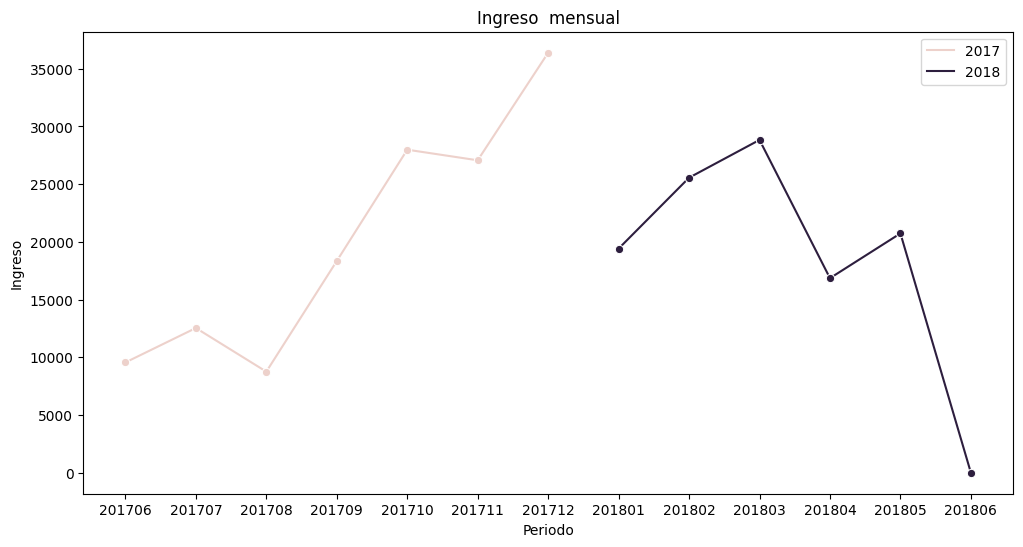

In [141]:
#Grafica del comportamiento del promedio del ingreso mensual
plt.figure(figsize=(12, 6))
sns.lineplot(data=ltv_mes, x="periodo", y="revenue", hue= "año_compra", marker="o")
plt.xlabel("Periodo")
plt.ylabel("Ingreso")
plt.title("Ingreso  mensual")
plt.legend()
plt.show()

La grafica muestra como hay un incremento significativo el segundo semestre del 2017 y luego una disminucion en los ingresos para el primer semestre del 2018. Necesitariamos mas datos para identificar si es un comportamiento patron siempre en todos los años o identificar la razon de la caida abrupta para el primer semestre

In [126]:
conversion.head()

,device,end_ts,source_id,start_ts,uid,duracion_min,año_inicio,semana_inicio,dia_inicio,mes_inicio,mes_final,buy_ts,revenue,año_compra,mes_compra,conversion_meses
0,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,313578113262317,18.0,2017,38,1,9,9,2018-01-03 21:51:00,0.55,2018,1,4
1,touch,2017-06-03 10:17:00,10,2017-06-03 10:13:00,1575281904278712,4.0,2017,22,6,6,6,2017-06-03 10:13:00,1.22,2017,6,0
2,desktop,2017-10-11 17:27:00,3,2017-10-11 17:14:00,2429014661409475,13.0,2017,41,3,10,10,2017-10-11 18:33:00,73.33,2017,10,0
3,desktop,2018-01-27 20:13:00,5,2018-01-27 20:10:00,2464366381792757,3.0,2018,4,6,1,1,2018-01-28 15:54:00,2.44,2018,1,0
4,desktop,2017-11-24 11:31:00,5,2017-11-24 11:22:00,2551852515556206,9.0,2017,47,5,11,11,2017-11-24 10:14:00,6.32,2017,11,0


In [127]:
#Determinar el tamaño de cada cohorte

cohorte_tamaño=conversion.groupby(['año_compra','mes_compra','conversion_meses']).agg({'uid':'nunique','revenue': 'sum'}).reset_index()
cohorte_tamaño

,año_compra,mes_compra,conversion_meses,uid,revenue
0,2017,6,0,2023,8060.32
1,2017,7,0,1753,8778.13
2,2017,7,1,170,1066.52
3,2017,8,0,1208,5528.15
4,2017,8,1,95,460.94
...,...,...,...,...,...
74,2018,5,8,42,156.62
75,2018,5,9,25,106.74
76,2018,5,10,33,111.21
77,2018,5,11,54,591.37


In [129]:
#Cambio del nombre de las columnas
cohorte_tamaño.columns = ['año_compra', 'mes_compra', 'edad_cohorte','num_compradores','ingresos']
cohorte_tamaño

,año_compra,mes_compra,edad_cohorte,num_compradores,ingresos
0,2017,6,0,2023,8060.32
1,2017,7,0,1753,8778.13
2,2017,7,1,170,1066.52
3,2017,8,0,1208,5528.15
4,2017,8,1,95,460.94
...,...,...,...,...,...
74,2018,5,8,42,156.62
75,2018,5,9,25,106.74
76,2018,5,10,33,111.21
77,2018,5,11,54,591.37


In [130]:
# Calcula el LTV dividiendo los ingresos por el número de compradores.
cohorte_tamaño['ltv'] = cohorte_tamaño['ingresos'] / cohorte_tamaño['num_compradores']
cohorte_tamaño.head()


,año_compra,mes_compra,edad_cohorte,num_compradores,ingresos,ltv
0,2017,6,0,2023,8060.32,3.984340
1,2017,7,0,1753,8778.13,5.007490
2,2017,7,1,170,1066.52,6.273647
3,2017,8,0,1208,5528.15,4.576283
4,2017,8,1,95,460.94,4.852000


In [131]:
#Se separa por año para verlo mas facil-2017

cohorte_tamaño['periodo'] = cohorte_tamaño['año_compra'].astype(str) + cohorte_tamaño['mes_compra'].astype(str)
cohorte_tamaño.head()

,año_compra,mes_compra,edad_cohorte,num_compradores,ingresos,ltv,periodo
0,2017,6,0,2023,8060.32,3.984340,20176
1,2017,7,0,1753,8778.13,5.007490,20177
2,2017,7,1,170,1066.52,6.273647,20177
3,2017,8,0,1208,5528.15,4.576283,20178
4,2017,8,1,95,460.94,4.852000,20178


In [132]:
# Preparar la tabla pivote para la visualización del LTV de cada cohorte por su 'edad' en meses.
cohorts_ltv = cohorte_tamaño.pivot_table(
    index='periodo', 
    columns='edad_cohorte', 
    values='ltv', 
    aggfunc='mean'
).cumsum(axis=1).fillna(0)
cohorts_ltv

edad_cohorte,0,1,2,3,4,5,6,7,8,9,10,11
periodo,,,,,,,,,,,,
201710,4.048724,8.962418,12.900353,17.002253,22.680992,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
201711,4.082100,8.435678,13.106028,18.229863,22.820088,27.558566,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
201712,4.257150,8.057788,11.273630,14.960983,18.483599,22.534638,26.479509,0.000000,0.000000,0.000000,0.000000,0.000000
20176,3.984340,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20177,5.007490,11.281137,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20178,4.576283,9.428283,14.639925,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20179,4.467036,8.345341,12.872917,18.289459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20181,3.598820,7.136963,10.436834,14.265168,17.825676,21.950413,26.679219,33.670236,0.000000,0.000000,0.000000,0.000000
20182,3.616574,7.559894,11.898503,15.963797,20.050498,23.649840,28.413430,33.553752,36.850159,0.000000,0.000000,0.000000


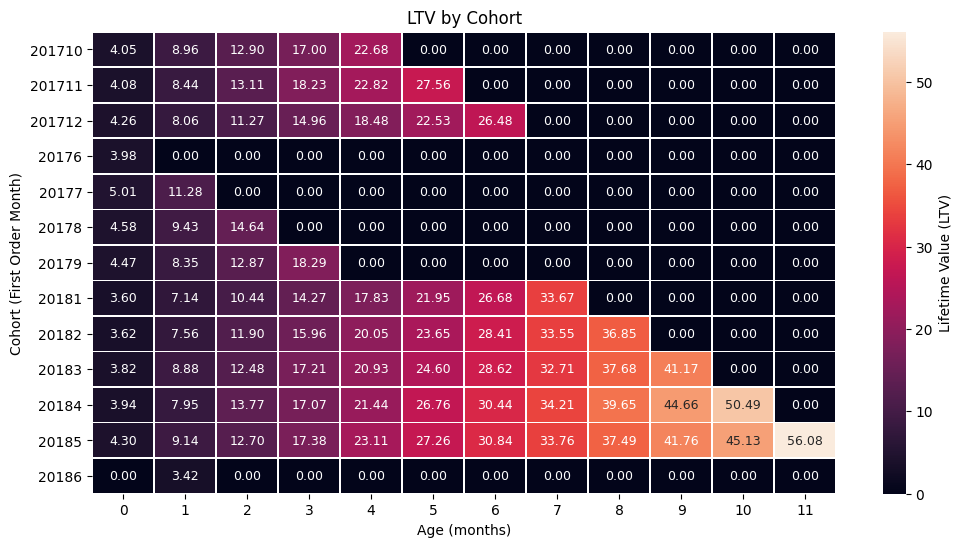

In [133]:
# Visualización del Heatmap del LTV
# Visualiza el LTV de las cohortes usando un mapa de calor.
plt.figure(figsize=(12, 6))  # Aumenta el tamaño de la figura si es necesario
ax = sns.heatmap(cohorts_ltv, annot=True, fmt=".2f", linewidths=0.5,
                 cbar_kws={'label': 'Lifetime Value (LTV)'}, annot_kws={"size": 9})
plt.title('LTV by Cohort')
plt.xlabel('Age (months)')
plt.ylabel('Cohort (First Order Month)')
plt.show()

### Marketing

#### Dinero invertido

In [43]:
costos.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [44]:
#Desglosamos las fechas para identificar los meses
costos['año']=costos['dt'].dt.year
costos['mes']=costos['dt'].dt.month
costos

,source_id,dt,costs,año,mes
0,1,2017-06-01,75.20,2017,6
1,1,2017-06-02,62.25,2017,6
2,1,2017-06-03,36.53,2017,6
3,1,2017-06-04,55.00,2017,6
4,1,2017-06-05,57.08,2017,6
...,...,...,...,...,...
2537,10,2018-05-27,9.92,2018,5
2538,10,2018-05-28,21.26,2018,5
2539,10,2018-05-29,11.32,2018,5
2540,10,2018-05-30,33.15,2018,5


In [45]:
#Queremos saber cuales han sido los gatos por recurso y por mes.

costos_mes=costos.groupby(['año','mes'])['costs'].sum().reset_index()
costos_mes

,año,mes,costs
0,2017,6,18015.00
1,2017,7,18240.59
2,2017,8,14790.54
3,2017,9,24368.91
4,2017,10,36322.88
5,2017,11,37907.88
6,2017,12,38315.35
7,2018,1,33518.52
8,2018,2,32723.03
9,2018,3,30415.27


In [46]:
#Costos por recursos para cada mes
costos_mes_recurso=costos.groupby(['año','source_id','mes'])['costs'].sum().reset_index()
costos_mes_recurso

,año,source_id,mes,costs
0,2017,1,6,1125.61
1,2017,1,7,1072.88
2,2017,1,8,951.81
3,2017,1,9,1502.01
4,2017,1,10,2315.75
...,...,...,...,...
79,2018,10,1,614.35
80,2018,10,2,480.88
81,2018,10,3,526.41
82,2018,10,4,388.25


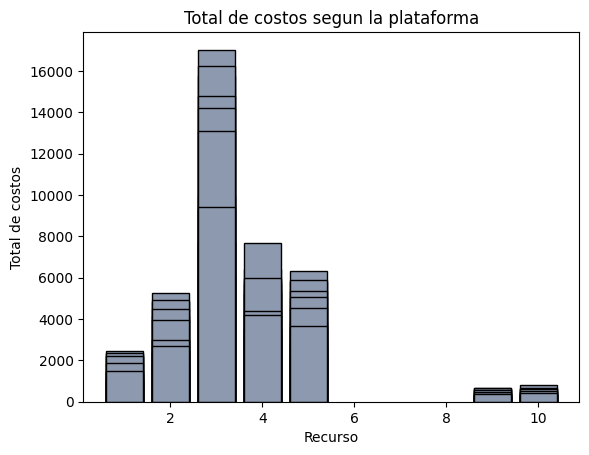

In [47]:
plt.bar(costos_mes_recurso['source_id'],costos_mes_recurso['costs'], color='#8d99ae', edgecolor='black')


plt.xlabel("Recurso")
plt.ylabel("Total de costos")
plt.title("Total de costos segun la plataforma")
plt.show()

La grafica muestra que el recurso al que mas se ha invertido dinero en marketing es el 3-desktop

In [48]:
#Total de dinero invertido en marketing 

dinero_invertido=costos['costs'].sum()

print(f"Total de dinero invertido en marketing: $", dinero_invertido)

Total de dinero invertido en marketing: $ 329131.62


#### Dinero invertido por mes


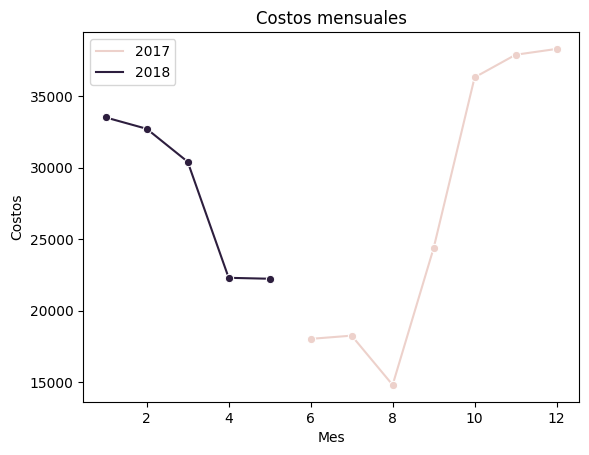

In [49]:
#Grafica del comportamiento del promedio del ingreso mensual
sns.lineplot(data=costos_mes, x="mes", y="costs", hue= "año", marker="o")

plt.xlabel("Mes")
plt.ylabel("Costos")
plt.title("Costos mensuales")
plt.legend()
plt.show()

Los costos al igual que los ingresos han disminuido para el año 2018

#### CAC

In [50]:
# Suponemos que la fuente de adquisición de cada usuario es la de su primer registro
usuario_recurso = visitas.sort_values(by='start_ts').groupby('uid').first().reset_index()
usuario_recurso.head()

,uid,device,end_ts,source_id,start_ts,duracion_min,año_inicio,semana_inicio,dia_inicio,mes_inicio,mes_final
0,11863502262781,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,6.0,2018,9,4,3,3
1,49537067089222,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,2.0,2018,6,2,2,2
2,297729379853735,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,1.0,2017,23,3,6,6
3,313578113262317,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,18.0,2017,38,1,9,9
4,325320750514679,desktop,2017-09-30 14:38:00,5,2017-09-30 14:29:00,9.0,2017,39,6,9,9


In [51]:
# Número de clientes adquiridos por fuente
cliente_recurso = usuario_recurso.groupby('source_id')['uid'].nunique()
print("Clientes adquiridos por fuente:")
display(cliente_recurso)

Clientes adquiridos por fuente:


source_id
1      9469
2     17616
3     66116
4     72346
5     49237
6         2
7        32
9      6448
10     6903
Name: uid, dtype: int64

In [69]:
#costo por fuente

costo_fuente=costos.groupby('source_id')['costs'].sum().reset_index()
costo_fuente

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [66]:
#Ingresos por fuente

ingresos=ordenes.merge(visitas, on='uid', how='left')
ingreso_fuente=ingresos.groupby('source_id')['revenue'].sum().reset_index()
ingreso_fuente

,source_id,revenue
0,1,2.298200e+06
1,2,2.638189e+06
2,3,2.966880e+05
3,4,4.966902e+05
4,5,1.181477e+06
5,7,1.220000e+00
6,9,3.634225e+04
7,10,1.461923e+04


In [54]:
#Calculo del CAC
cac=(costo_fuente/cliente_recurso)
cac

source_id
1     2.200155
2     2.429952
3     2.137480
4     0.844188
5     1.051183
6          NaN
7          NaN
9     0.855690
10    0.843472
dtype: float64

#### ROMI

In [55]:
# Calcular ROMI: (ingresos - gasto) / gasto

romi=(ingreso_fuente-costo_fuente)/costo_fuente
romi

source_id
1     109.313944
2      60.631237
3       1.099381
4       7.132649
5      21.827344
7            NaN
9       5.586736
10      1.510821
dtype: float64

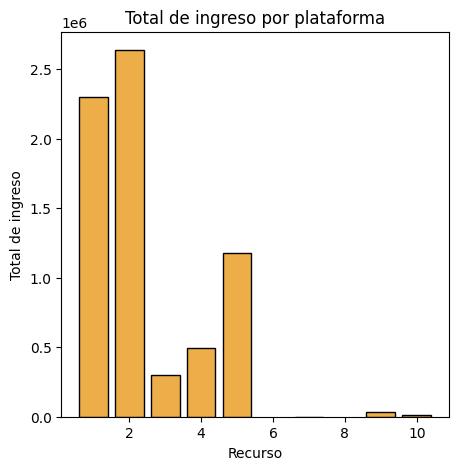

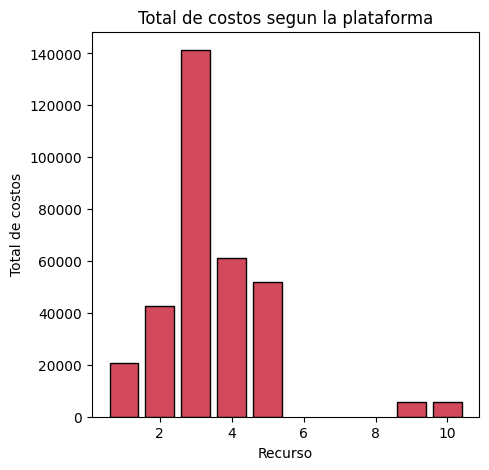

In [70]:
#Grafica de los ingresos y costos por fuente

plt.figure(figsize=(5,5))
plt.bar(ingreso_fuente['source_id'],ingreso_fuente['revenue'], color='#edae49', edgecolor='black')


plt.xlabel("Recurso")
plt.ylabel("Total de ingreso")
plt.title("Total de ingreso por plataforma")



plt.figure(figsize=(5,5))
plt.bar(costo_fuente['source_id'],costo_fuente['costs'], color='#d1495b', edgecolor='black')


plt.xlabel("Recurso")
plt.ylabel("Total de costos")
plt.title("Total de costos segun la plataforma")
plt.show()




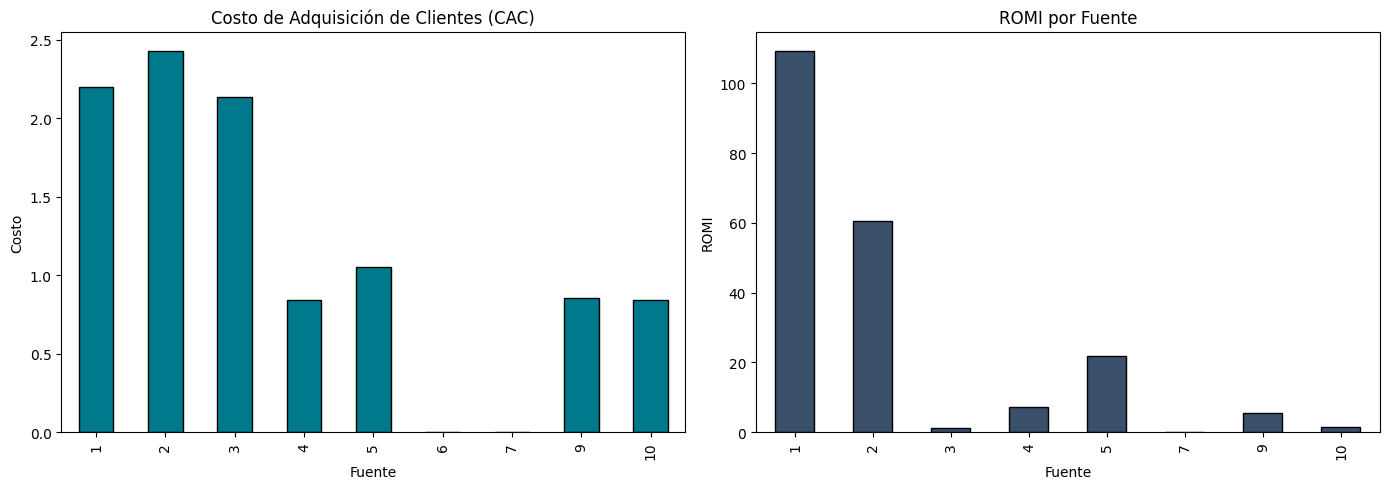

In [71]:
# Graficar CAC y ROMI
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

cac.plot(kind='bar', ax=ax[0], edgecolor='black', color='#00798c')
ax[0].set_title('Costo de Adquisición de Clientes (CAC)')
ax[0].set_xlabel('Fuente')
ax[0].set_ylabel('Costo')

romi.plot(kind='bar', ax=ax[1], edgecolor='black', color='#3a506b')
ax[1].set_title('ROMI por Fuente')
ax[1].set_xlabel('Fuente')
ax[1].set_ylabel('ROMI')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Celdas [43–49]</b> <a class="tocSkip"></a><br>
Tu analisis te lleva a las conlusiones esperadas. Las fuentes 3 y 10 no son rentables. Buen trabajo Alejandra. 
</div>


# Conclusiones

Tras analizar las métricas, se destacan los siguientes puntos:

Tiempo hasta la conversión: La mayoria de usuarios tienden a volver entre 0 y 1 mes. Sin embargo, hay otros usuarios que tienen a volver hasta 6 meses despues. Que la mayoria de usuarios vuelvan el mismo mes es un indicativo que puede que la mayoria compre en el primer momento.

Costo de Adquisición (CAC): La comparación del CAC entre las fuentes muestra que algunas permiten adquirir clientes a menor costo. Esto sugiere focalizar la inversión en estos canales. Por ejemplo, la grafica muestra que el mayor ingreso viene de la plataforma 2 y es una plataforma a la cual no se le ha invertido demasiado en comparacion a la plataforma 3 que es la que mas dinero se le ha invertido y no muestra un ROMI(ganancias) llamativo, por lo que se considera que no es rentable

Rentabilidad (ROMI): Las fuentes con altos ingresos en comparación con el gasto son las más rentables. Las inversiones en canales con ROMI negativo deben ser evaluadas y optimizadas.


RECOMENDACIONES

-Invertir en fuentes con bajo CAC y alto ROMI: Esto permitirá optimizar la inversión en publicidad y lograr un mayor retorno.
-Impulsar campañas que generen conversiones rápidas: Dado que una gran parte de los usuarios realiza su primera compra en el mismo mes o al mes siguiente, es importante enfocarse en este tipo de campañas.
-Revisar y ajustar inversiones en canales de bajo rendimiento: Canalizar esfuerzos y presupuesto hacia aquellos canales que demuestren mejor rendimiento en conversión y rentabilidad.